# Titanic - Machine Learning from Disaster
The purpose of this project is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
Kaggle presents two different datasets, the first one with the output to train the model and the second one to test your model.

### Project Planning
* Import the libraries and Datasets
* Variable Description
    * Numecial Variables
    * Categorical Variables
* Basic Data Analysis with groups
* Dealing with Outliers
* Dealing with missing values
* Discovering some trends
* Feature Engineering
* Dropping non useful features
* Dummy variables
* Value preparation for models
* Scale Data
* Model Building - using cross validation
    * Naive Bayes
    * Support Vector Clasifier
    * Desicion Tree
    * Random Forest
    * K Nearest Neighbor
    * Logistic Regression
* Predicting with the best Model
* Importing the values into a CSV File


### Import Libraries and Datasets

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #visualizations
from collections import Counter

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
df_train = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [3]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Variable Description
* PassengerId: unique id number to each passenger 
* Survived: passenger 
* Pclass: passenger class
* Name: name
* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings/spouses
* Parch: number of parents/children
* Ticket: ticket number
* Fare: amount of money spent on ticket
* Cabin: cabin number
* Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

    
* float64: Fare, Age
* int64: Pclass, sibsp, parch, passengerId, survived
* object: Cabin, embarked, ticket, name, sex


* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp, Parch
* Numerical Variable: Fare, age, passengerId

#### Categorical Variables 

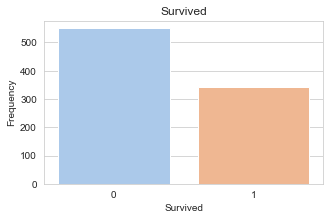

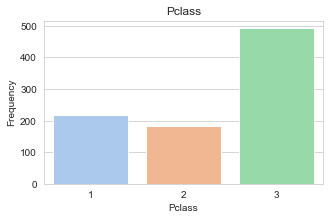

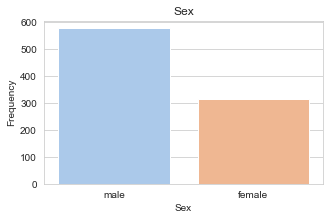

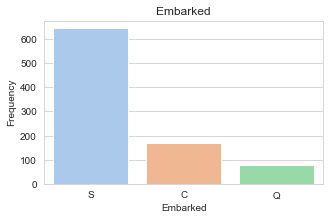

In [7]:
df_cat = df_train[['Survived','Pclass','Sex','Embarked']]

for i in df_cat.columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x=i, data=df_train, palette='pastel')
    plt.ylabel('Frequency')
    plt.title(i)

#### Numerical Variables 

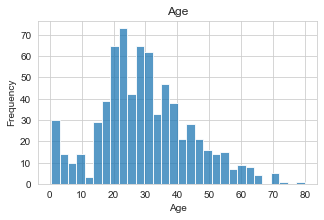

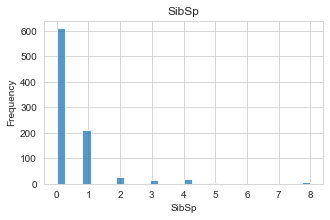

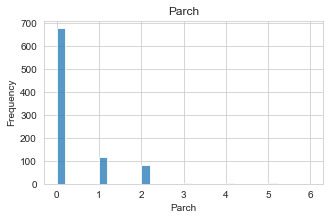

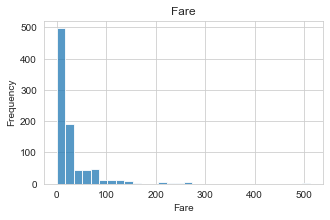

In [8]:
df_num = df_train[['Age','SibSp','Parch','Fare']]

for i in df_num.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(x=i, data=df_train, bins=30)
    plt.ylabel('Frequency')
    plt.title(i)



### Basic Data Analysis with groups

In [9]:
#Pclass vs Survived
df_train.groupby(by='Pclass')['Survived'].mean().sort_values(ascending=False)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [10]:
#Parch vs Survived
df_train.groupby(by='Parch')[ 'Survived'].mean().sort_values(ascending=False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64

In [11]:
#SibSp vs Survived
df_train.groupby(by='SibSp')['Survived'].mean().sort_values(ascending=False)

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
8    0.000000
5    0.000000
Name: Survived, dtype: float64

In [12]:
#Sex vs survived
df_train.groupby(by='Sex')['Survived'].mean().sort_values(ascending=False)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### Dealing with Outliers
by Ritesh Yadav

In [13]:
#Detect and delete outliers
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [14]:
df_train.loc[detect_outliers(df_train,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [15]:
# drop outliers
df_train = df_train.drop(detect_outliers(df_train,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

### Dealing with missing values

In [16]:
#We will concat the train and test dataset to deal with missing values 
df_train_len = len(df_train)
df_train = pd.concat([df_train,df_test],axis = 0).reset_index(drop=True)

In [17]:
#Embarked has 4 nulls and Fare has 4
df_train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [18]:
#Dealing with Embarked 
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

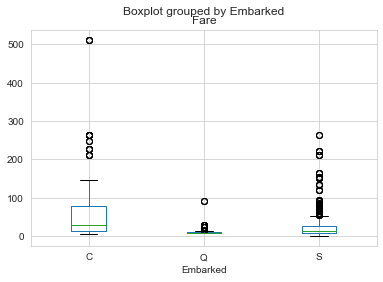

In [19]:
df_train.boxplot(column='Fare', by='Embarked')

In [20]:
#Must of the Fares over 40 embarked at Cherboug
df_train['Embarked'] = df_train['Embarked'].fillna('C')
df_train['Embarked'].isnull().sum()

0

In [21]:
#Dealing with Fare
df_train[df_train['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [22]:
#Will compute the mean of the Class 3 Ticket
a = np.mean(df_train[df_train['Pclass'] == 3]['Fare'])
df_train['Fare'] = df_train['Fare'].fillna(a)
df_train[df_train['Fare'].isnull()]['Fare'].sum()

0.0

Text(0.5, 1.0, 'Missing Ages by Class')

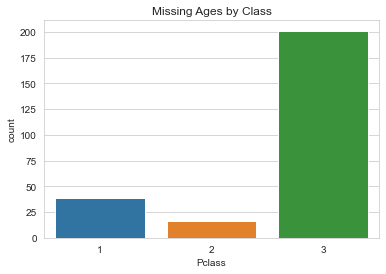

In [23]:
#Dealing with age
no_age = df_train[df_train['Age'].isnull()]
sns.countplot(data=no_age, x='Pclass')
plt.title("Missing Ages by Class")

In [24]:
df_train.groupby('Pclass')['Age'].mean()

Pclass
1    39.343132
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [25]:
#Compute the mean of the age in every class
df_train.loc[(df_train["Pclass"] == 1) & (df_train["Age"].isnull()), 'Age'] = df_train.groupby('Pclass')['Age'].mean()[1]
df_train.loc[(df_train["Pclass"] == 2) & (df_train["Age"].isnull()), 'Age'] = df_train.groupby('Pclass')['Age'].mean()[2]
df_train.loc[(df_train["Pclass"] == 3) & (df_train["Age"].isnull()), 'Age'] = df_train.groupby('Pclass')['Age'].mean()[3]
df_train['Age'].isnull().sum()

0

In [26]:
#Dealing with missing values in cabin | Algorithm created by Bekezhan Issabek
#The letters of the cabins represent the part of the ship where the cabin is
for d in df_train:
    df_train['Cabin'] = df_train['Cabin'].str[0]
df_train['Cabin'].value_counts()

C    91
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

<AxesSubplot:>

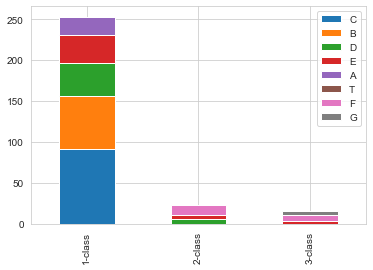

In [27]:
Pclass1 = df_train[df_train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = df_train[df_train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = df_train[df_train['Pclass'] == 3]['Cabin'].value_counts()

cabin_df = pd.DataFrame([Pclass1, Pclass2, Pclass3], index=['1-class', '2-class', '3-class'])

cabin_df.plot(kind='bar', stacked=True)

#Class1: A,E,D,B,C | Class2: F,E,D | Class3: G,F,E

In [28]:
first_class = df_train[df_train['Pclass'] == 1]['Cabin'].mode()[0] #C
second_class = df_train[df_train['Pclass'] == 2]['Cabin'].mode()[0] #F
third_class = df_train[df_train['Pclass'] == 3]['Cabin'].mode()[0] #F

In [29]:
#Filling the missing cabins with its mode
for i in range(len(df_train)):
    if (df_train['Pclass'][i] == 1) & (df_train['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
        df_train['Cabin'][i] = first_class
    elif (df_train['Pclass'][i] == 2) & (df_train['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
        df_train['Cabin'][i] = second_class
    elif (df_train['Pclass'][i] == 3) & (df_train['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
        df_train['Cabin'][i] = third_class

<ipython-input-29-13478bdc6974>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cabin'][i] = third_class
<ipython-input-29-13478bdc6974>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cabin'][i] = second_class
<ipython-input-29-13478bdc6974>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cabin'][i] = first_class


In [30]:
df_train.isnull().sum()
#NO MORE MISSING DATA

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

### Discovering some trends

<AxesSubplot:>

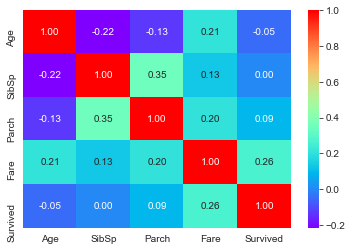

In [31]:
sns.heatmap(df_train[['Age','SibSp','Parch','Fare', 'Survived']].corr(), annot=True, fmt='.2f', cmap='rainbow')
#Fare has a strong correlation with survive

Text(6.800000000000004, 0.5, 'Survived Probability')

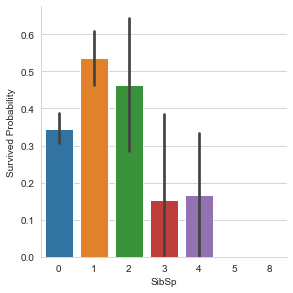

In [32]:
sns.catplot(x="SibSp", y="Survived", data=df_train, kind="bar", height=4)
plt.ylabel("Survived Probability")

Text(6.800000000000004, 0.5, 'Survived Probability')

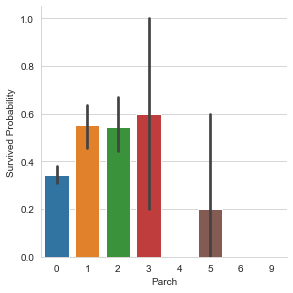

In [33]:
sns.catplot(x = "Parch", y = "Survived", kind = "bar", data=df_train, height=4)
plt.ylabel("Survived Probability")
#Small familires have moe change to survive

Text(6.800000000000004, 0.5, 'Survived Probability')

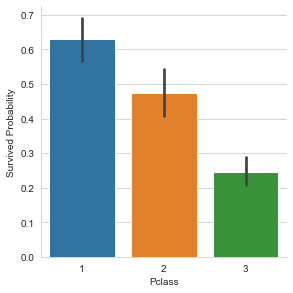

In [34]:
sns.catplot(x = "Pclass", y = "Survived", kind = "bar", data=df_train, height=4)
plt.ylabel("Survived Probability")
#Small familires have moe change to survive

Text(6.800000000000004, 0.5, 'Survived Probability')

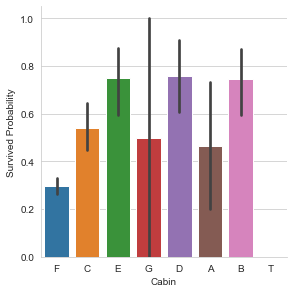

In [35]:
sns.catplot(x = "Cabin", y = "Survived", kind = "bar", data=df_train, height=4)
plt.ylabel("Survived Probability")
#No trend visible

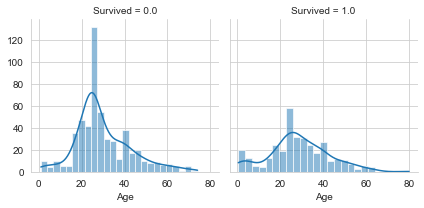

In [36]:
plot = sns.FacetGrid(df_train, col = "Survived")
plot.map(sns.histplot, "Age", bins = 25, kde=True)

### Feature Engineering

In [37]:
#Getting the title of the person from the name column
df_train['Title'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_train['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
the Countess      1
Capt              1
Don               1
Sir               1
Jonkheer          1
Dona              1
Mme               1
Name: Title, dtype: int64

In [38]:
#changing the values of the title with low apperances
df_train['Title'] = df_train['Title'].replace(
        ["Lady","the Countess","Capt","Don","Major","Sir","Jonkheer","Dona", 'Mme', 'Mlle', 'Ms', 'Col'],"Other")

<AxesSubplot:xlabel='Title', ylabel='count'>

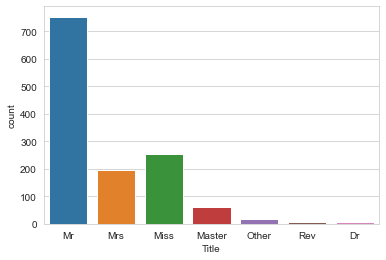

In [39]:
sns.countplot(x="Title", data = df_train)

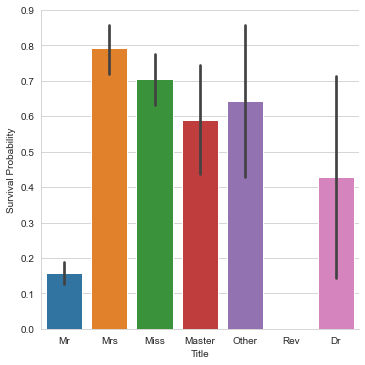

In [40]:
g = sns.catplot(x = "Title", y = "Survived", data = df_train, kind = "bar")
g.set_ylabels("Survival Probability")

In [41]:
#Family Size
df_train['FamilySize'] = df_train["SibSp"] + df_train["Parch"] + 1

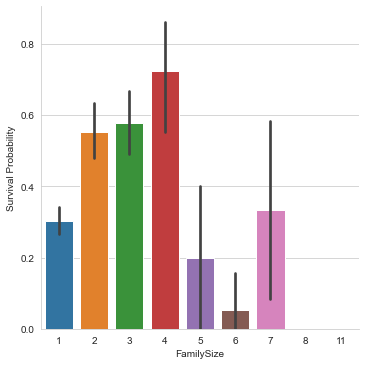

In [42]:
g = sns.catplot(x = "FamilySize", y = "Survived", data = df_train, kind = "bar")
g.set_ylabels("Survival Probability")

In [43]:
#Creating a Categorical Value based on the age
df_train['AgeGroup'] = df_train['Age']

In [44]:
for i in range(len(df_train)):
    if df_train['AgeGroup'][i] < 5:
        df_train['AgeGroup'][i] = 'baby'
        continue
    if df_train['AgeGroup'][i] < 17:
        df_train['AgeGroup'][i] = 'child'
        continue
    elif df_train['AgeGroup'][i] < 30:
        df_train['AgeGroup'][i] = 'young adult'
        continue
    elif df_train['AgeGroup'][i] < 45:
        df_train['AgeGroup'][i] = 'mid adult'
        continue
    elif df_train['AgeGroup'][i] < 60:
        df_train['AgeGroup'][i] = 'adult'
        continue
    elif df_train['AgeGroup'][i] >= 60:
        df_train['AgeGroup'][i] = 'old'
        continue
df_train['AgeGroup'].value_counts()

<ipython-input-44-bcbabe6b6499>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AgeGroup'][i] = 'young adult'
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-44-bcbabe6b6499>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AgeGroup'][i] = 'mid adult'
<ipython-input-44-bcbabe6b6499>:15: S

young adult    649
mid adult      340
adult          136
child           83
baby            51
old             40
Name: AgeGroup, dtype: int64

In [45]:
df_train['AgeGroup'].value_counts()

young adult    649
mid adult      340
adult          136
child           83
baby            51
old             40
Name: AgeGroup, dtype: int64

### Dropping non useful features

In [46]:
df_train.drop(labels=["PassengerId", 'SibSp', 'Parch', 'Ticket', 'Age', 'Name'], axis=1, inplace=True)

In [47]:
df_train.head()

,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,FamilySize,AgeGroup
0,0.0,3,male,7.2500,F,S,Mr,2,young adult
1,1.0,1,female,71.2833,C,C,Mrs,2,mid adult
2,1.0,3,female,7.9250,F,S,Miss,1,young adult
3,1.0,1,female,53.1000,C,S,Mrs,2,mid adult
4,0.0,3,male,8.0500,F,S,Mr,1,mid adult


### Dummy Variables
Sex, Cabin, Embarked, Title, FamilySize, AgeGroup

In [48]:
df_train = pd.get_dummies(df_train, columns=["AgeGroup", "Cabin", "Sex", "Embarked", "Pclass", 'Title'], 
                          prefix=["AgeGroup", "Cabin", "Sex", "Embarked", "Pclass", 'Title'])

In [49]:
df_train.columns

Index(['Survived', 'Fare', 'FamilySize', 'AgeGroup_adult', 'AgeGroup_baby',
       'AgeGroup_child', 'AgeGroup_mid adult', 'AgeGroup_old',
       'AgeGroup_young adult', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

### Creating features and resutls for models

In [50]:
train = df_train[0:df_train_len]
test = df_train[df_train_len:]

In [51]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

X_test = test.drop('Survived', axis=1)

### Scale Data
Fare, FamilySize

In [52]:
from sklearn.preprocessing import StandardScaler

#Create an object of the class
sc = StandardScaler()

#Dont scale dummy variables
X_train[['Fare', 'FamilySize']] = sc.fit_transform(X_train[['Fare', 'FamilySize']])
X_test[['Fare', 'FamilySize']] = sc.transform(X_test[['Fare', 'FamilySize']]) #using the same scaler as the train set

### Model Building
* Naive Bayes = 50.50%
* Support Vector Clasifier = 83.09% (BEST SCORE)
* Desicion Tree = 79.80%
* Random Forest = 80.82%
* K Nearest Neighbor = 82.18%
* Logistic Regression = 82.63%

In [53]:
#import cross validation | folds=5
from sklearn.model_selection import cross_val_score

In [54]:
# N A I V E . B A Y E S
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
cv.mean()

0.5050398048279404

In [55]:
#S U P P O R T . V E C T O R . C L A S S I F I E R
from sklearn.svm import SVC

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
cv.mean()

0.830861581920904

In [56]:
#D E S I C I O N . T R E E
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state = 42)
cv = cross_val_score(dt,X_train,y_train,cv=5)
cv.mean()

0.797977657935285

In [57]:
#R A N D O M . F O R E S T
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
cv = cross_val_score(rf,X_train,y_train,cv=5)
cv.mean()


0.8081920903954801

In [58]:
#K . N E A R E S T . N E I G H B O R 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train,cv=5)
cv.mean()

0.8217835130970725

In [59]:
#L O G I S T I C . R E G R E S S I O N 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
cv.mean()

0.826328967642527

### Predicting with the best Model

In [60]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
type(y_pred)

numpy.ndarray

### Importing the values into a CSV File

In [61]:
results = df_test.copy()
results['Survived'] = pd.Series(y_pred)

In [62]:
results.to_csv('Results.csv', index=False)